# Table of Contents
 <p><div class="lev1 toc-item"><a href="#ATENÇÃO:-este-notebook-ainda-não-está-pronto" data-toc-modified-id="ATENÇÃO:-este-notebook-ainda-não-está-pronto-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>ATENÇÃO: este notebook ainda não está pronto</a></div><div class="lev1 toc-item"><a href="#Representação,-Leitura-e-Visualização-de-Imagens" data-toc-modified-id="Representação,-Leitura-e-Visualização-de-Imagens-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Representação, Leitura e Visualização de Imagens</a></div><div class="lev2 toc-item"><a href="#Imagem-como-matriz" data-toc-modified-id="Imagem-como-matriz-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Imagem como matriz</a></div><div class="lev2 toc-item"><a href="#Leitura-de-uma-imagem" data-toc-modified-id="Leitura-de-uma-imagem-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Leitura de uma imagem</a></div><div class="lev2 toc-item"><a href="#Visualização-de-uma-imagem" data-toc-modified-id="Visualização-de-uma-imagem-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Visualização de uma imagem</a></div><div class="lev2 toc-item"><a href="#Visualizando-numericamente-uma-pequena-região-de-interesse-da-imagem" data-toc-modified-id="Visualizando-numericamente-uma-pequena-região-de-interesse-da-imagem-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Visualizando numericamente uma pequena região de interesse da imagem</a></div><div class="lev2 toc-item"><a href="#Criando-legenda-da-imagem-com-impressão-de-variáveis" data-toc-modified-id="Criando-legenda-da-imagem-com-impressão-de-variáveis-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Criando legenda da imagem com impressão de variáveis</a></div>




# Representação, Leitura e Visualização de Imagens

Uma imagem digital pode ser representada por uma matriz bidimensional, onde os seus elementos são chamados de pixels 
(abreviatura de *picture elements*). Existem vários pacotes de processamento de imagens onde a imagem é representada
por uma estrutura de dados específica. No nosso caso, no Adessowiki iremos utilizar a matriz disponível no *ndarray NumPy*.
A vantagem é que todas as operações disponíveis para processamento matricial podem ser utilizados como processamento de
imagens. Este é um dos principais objetivos deste curso: como utilizar linguagens de processamento matricial para fazermos
processamento de imagens.

## Imagem como matriz

Neste curso, uma imagem é definida pelo seu cabeçalho (tamanho da matriz e tipo de pixel) e pelos pixels em si. Estas
informações são inerentes ao tipo ``ndarray`` do NumPy.

O tamanho da matriz é caracterizado pelas suas dimensões: vertical e horizontal.
A dimensão vertical é definida pelo número de linhas (*rows*) ou altura H (*height*) e a dimensão
horizontal é definida pelo número de colunas (*cols*) ou largura W (*width*). No NumPy, as dimensões são armazenadas
no ``shape`` da matriz como uma tupla (H,W). 

Uma imagem pode ter valores de pixels que podem ser armazenados em vários tipos de dados: 
a imagem binária tem apenas dois valores possíveis, 
muitas vezes atribuídos a preto e branco; uma imagem em nível de cinza tem valores inteiros positivos, muitas vezes, de 0 a um 
valor máximo. É possível ter pixels com valores negativos, com números reais, e até mesmo pixels com valores complexos. 
Um exemplo de uma imagem com valores de pixel negativos são imagens térmicas com temperaturas negativas. 
As imagens com pixels que são números reais podem ser encontradas nas imagens que representam uma onda senóide com valores que 
variam de -1 a +1. As imagens com os valores de pixel complexos podem ser encontrados em algumas transformações da imagem como 
a Transformada Discreta de Fourier.

Como as imagens usualmente possuem centenas de milhares ou milhões de pixels, é importante escolher a menor representação do
pixel para economizar o uso da memória do computador e usar a representação que seja mais eficiente para processamento.

No Numpy, o tipo do pixel é armazenado no ``dtype`` que pode assumir vários tipos. Os quatro tipos que mais usaremos neste curso
são indicados na tabela:

======  ===============================
dtype   valores
======  ===============================
bool    True, False
uint8   8 bits sem sinal, de 0 a 255
uint16  16 bits sem sinal, de 0 a 65535
int     64 bits com sinal
float   ponto flutuante
======  ===============================

## Leitura de uma imagem

Neste curso iremos trabalhar com imagens criadas sinteticamente e com imagens guardadas em arquivos. A leitura de uma
imagem no Adessowiki é feita pelas funções ``adread`` e ``adreadgray`` que utilizam o pacote 
`http://effbot.org/imagingbook/ PIL` de processamento de imagens. Neste curso não utilizaremos as funções de processamento
de imagens do PIL, mas sim utilizaremos as operações matriciais do NumPy. Existem diversas formas de salvar uma imagem em
arquivo e utilizaremos as mais comuns: png, jpg, tif. As imagens disponíveis podem ser visualizadas na toolbox ia636 do Adessowiki:
`ia636:iaimages`.

Veja a seguir um exemplo de leitura de imagem e a impressão de seu cabeçalho e de seus pixels:


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

!ls ../data

angiogr.tif	boat.tif	     digits_train.png	lenina.pgm
astablet.tif	cameraman.tif	     gull.pgm		potatoes.tif
barcode.tif	chickparts.tif	     halftone.png	retina.tif
beef.tif	convrect.gif	     ia870_iadbeef.pdf	tvframe.pgm
bloodcells.tif	digits_test_200.png  keyb.tif		woodlog.tif


In [2]:
f = mpimg.imread('../data/cameraman.tif')

print('Tamanho de f: ', f.shape)
print('Tipo do pixel:', f.dtype)
print('Número total de pixels:', f.size)
print('Pixels:\n', f)

Tamanho de f:  (256, 256)
Tipo do pixel: uint8
Número total de pixels: 65536
Pixels:
 [[169 168 174 ... 194 191 193]
 [174 175 176 ... 188 186 186]
 [171 178 172 ... 195 188 191]
 ...
 [178 183 183 ... 144 186 174]
 [187 180 157 ... 148 183 152]
 [169 170 160 ... 160 198 165]]


Note que a imagem possui 174 linhas e 314 colunas, totalizando mais de 54 mil pixels. A representação do pixel é pelo tipo
``uint8``, isto é, valores de 8 bits sem sinal, de 0 a 255. Note também que a impressão de todos os pixels é feita de
forma especial. Se todos os 54 mil pixels tivessem que ser impressos, o resultado da impressão seria proibitivo. Neste caso, quando
a imagem (matriz) for muito grande, o NumPy imprime apenas os pixels dos quatro cantos da imagem.

## Visualização de uma imagem

No Adessowiki, a visualização de uma imagem é feita unicamente pela função ``adshow``, que internamente utiliza o pacote PIL já
mencionado. O processo de exibição de uma imagem cria uma representação gráfica desta matriz 
em que os valores do pixel é atribuído a um nível de cinza (imagem monocromática) ou a uma cor particular. Quando o pixel da imagem
é ``uint8``, o valor zero é atribuído ao preto e o valor 255 ao branco e gerando um tom de cinza proporcional ao valor do pixel.

Veja abaixo a visualização da imagem ``cookies.tif`` já lida no trecho de programa anterior. Note que a função ``adshow`` possui
dois parâmetros, a imagem e um string para ser exibido na legenda da visualização da imagem.

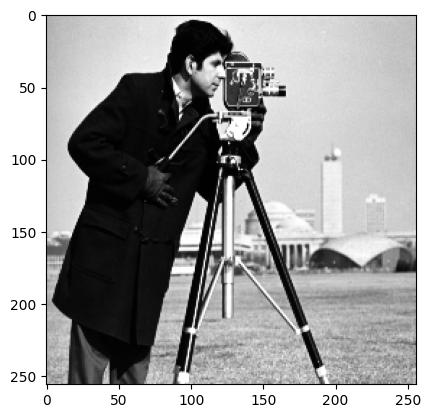

In [3]:
plt.imshow(f,cmap='gray')

O segundo tipo de imagem que o ``adshow`` visualiza é a imagem com pixels do tipo booleano. Como ilustração, faremos uma
operação comparando cada pixel da imagem cookies com o valor 128 gerando assim uma nova imagem ``f_bin`` onde cada pixel será
``True`` ou ``False`` dependendo do resultado da comparação. O ``adshow`` mapeia os pixels verdadeiros como branco e os pixels
falsos como preto:

Tipo do pixel: bool
False True
0.0 1.0
0 1


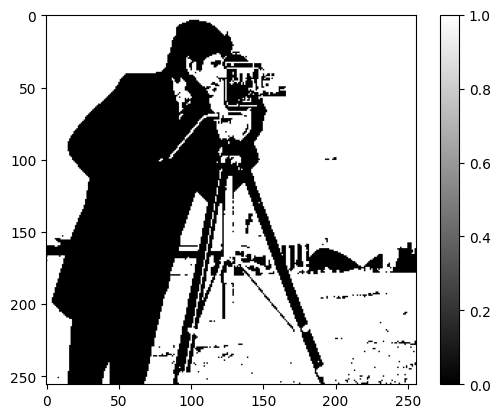

In [7]:
f_bin = f > 128
print('Tipo do pixel:', f_bin.dtype)
plt.imshow(f_bin,cmap='gray')
plt.colorbar()
print(f_bin.min(), f_bin.max())
f_f = f_bin.astype(np.float32)
f_i = f_bin.astype(np.int16)
print(f_f.min(),f_f.max())
print(f_i.min(),f_i.max())


    
Por fim, além destes dois modos de exibição, o ``adshow`` pode também exibir imagens coloridas no formato RGB e tipo de pixel ``uint8``.
No NumPy a imagem RGB é representada como três images armazenadas na dimensão profundidade. Neste caso o ``array`` tem 3
dimensões e seu ``shape`` tem o formato (3,H,W). 

Dimensões:     (257, 256, 3)
Tipo do pixel: uint8


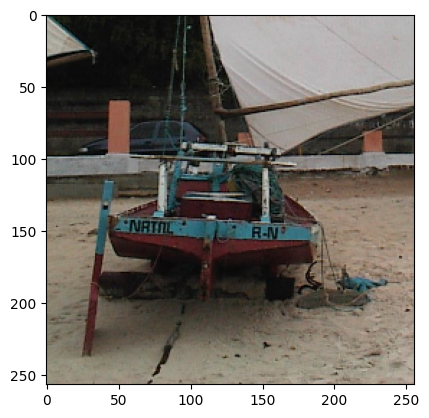

In [8]:
f_cor = mpimg.imread('../data/boat.tif')
print('Dimensões:    ', f_cor.shape)
print('Tipo do pixel:', f_cor.dtype)
plt.imshow(f_cor)

In [9]:
f_roi = f_cor[:2,:3,:]
print(f_roi)

[[[ 59  93  92]
  [ 42  74  71]
  [  0  24  20]]

 [[120 146 145]
  [ 44  76  73]
  [ 41  77  75]]]


Neste curso, por motivos didáticos, o ``adshow`` somente visualiza estes 3 tipos de imagens. Qualquer outro tipo de imagem,
seja de valores maiores que 255, negativos ou complexos, precisam ser explicitamente convertidos para os valores entre 0 e 255
ou ``True`` e ``False``.
    
Maiores informações no uso do ``adshow`` podem ser vistas em `ia636:adshow`.

.. note:: Uma das principais causas de erro em processamento de imagens é não prestar atenção no tipo do pixel ou nas dimensões da
    imagem. Recomenda-se verificar esta informações. Uma função que é bastante útil é a `ia636:iaimginfo` que foi criada para
    verificar rapidamente o tipo de pixel, dimensões e os valores mínimo e máximo da imagem. Veja a seguir um exemplo do seu uso
    nas três imagens processadas anteriormente:
    

    import ia636
    print 'f:    ', ia636.iaimginfo(f)
    print 'f_bin:', ia636.iaimginfo(f_bin)
    print 'f_cor:', ia636.iaimginfo(f_cor)

## Visualizando numericamente uma pequena região de interesse da imagem

Para verificar que a imagem lida é composta de valores entre 0 e 255, vamos imprimir numericamente
apenas uma pequena região de 7 linhas e 10 colunas do canto superior esquerdo da imagem. Fazemos isto
com fatiamento:

g=
[[41 53 53 53 53 49 49 53 53 56]
 [44 53 39 39 53 53 46 39 53 41]
 [46 39 41 53 41 39 39 53 49 41]
 [41 39 39 53 41 46 46 53 41 49]
 [39 49 46 46 39 39 56 39 53 49]
 [53 39 41 41 53 39 46 46 39 53]
 [58 41 41 53 46 41 46 53 39 53]]


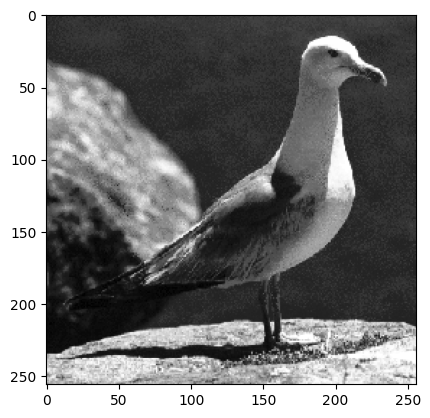

In [10]:
f= mpimg.imread('../data/gull.pgm')
plt.imshow(f,cmap='gray')
g = f[:7,:10]
print('g=')
print(g)

## Criando legenda da imagem com impressão de variáveis

É oportuno colocar informações na legenda da imagem na hora de mostrá-la pelo ``adshow``.
Constrói-se um string contendo a informação desejada. O Python possui diversas facilidades
para criar este string. Abaixo é utilizado a formatação via %, onde o string é formatado
utilizando campos especiais: %s (string), %d (inteiro), %f (ponto flutuante), entre outros.
A variáveis a serem preenchidas nestes campos são colocadas na forma de tupla do Python.
Veja o exemplo abaixo:

.. code:: python
   
   f = adreadgray('astablet.tif') 
   H,W = f.shape
   legenda = 'astablet dimensões: (%d,%d)' % (H,W)
   adshow(f, legenda)